<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>


- Principal Component Analysis
   - Coordinate transform & dimensionality reduction
   - Projection perspective of PCA
   - Visualization

<hr/>

**Reminder:** Next week, Monday, September 4, Midterm Exam 1 **from 12pm-1:15pm**!

<h1><font color="darkblue">Principal Component Analysis</font></h1>

## Review of PCA

<!--<img src="files/800px-GaussianScatterPCA.png" width=300 align=left>-->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align=topleft>


#### Recall: 
Assume $n$ data points $\{x_1,\ldots,x_n\} \subset \mathbb{R}^D$ are given, define **data matrix** $X$:
  > $X = \begin{bmatrix} x_1 ,\dots, x_n \end{bmatrix} \in \mathbb{R}^{D \times n}$.
  
If  $\overline{X}:= \frac{1}{n}X \mathbf{1}\mathbf{1}^T = (\frac{1}{n} \sum_{i=1}^n (x_i)_j)_{j,\ell}$ be the matrix with row averages of $X$, define **centered data matrix** $\widetilde{X}$:
  > $\widetilde{X} = X -\overline{X} \in \mathbb{R}^{D \times n}$.

**Sample covariance matrix** $C$:
  >$\displaystyle C =  \frac{1}{n\!-\!1}\widetilde{X}\widetilde{X}^T$

### Principal Components as directions of maximal variance
If $X=\widetilde{X}$ is centered: **1st principal direction (or 1st principal component)** $u_1 \in \mathbb{R}^D$ is direction of maximal variance of $X$, i.e., $u_1$ maximizes

> $\displaystyle \mathbb{Var}[u_1^T X'] = \frac{n-1}{n}u_1^T C u_1 $

($X'$ is empirical distribution of $X$, i.e., the uniform distribution on $\{x_1,\ldots,x_n\}$).

If $k \leq D$, we can perform **$k$-dimensional PCA**: <br>
Find  **$k$ principal directions (principal components)** $u_1,u_2,\ldots,u_k \in \mathbb{R}^D$ that are
  - orthonormal basis of a $k$-dimensional subspace of $\mathbb{R}^D$, i.e.,
> $u_i^T u_j = \delta_{ij} = \begin{cases} 1, & \text{ if }i = j, \\ 0, & \text{ if } i \neq j,\end{cases}$ for all $i,j=1,\ldots,k$, and 
  - the projection of $X$ onto this subspace has the most variance, i.e., the largest
> $ \sum_{i=1}^k \mathbb{Var}\left[ u_i^T X' \right]  = \sum_{i=1}^k \mathbb{E}[(u_i^T X')^2] = \mathbb{E}\left[\| E_k^T X'\|_2^2 \right] = \frac{1}{n} \sum_{j=1}^n \|     E_k^T x_j\|_2^2 = \frac{n-1}{n} E_k^T C E_k,
$ 

  if $E_k =\begin{bmatrix} u_1 ,\dots, u_k \end{bmatrix} \in \mathbb{R}^{D \times k}$.

### Connection to linear algebra

  We saw that $E_k$ is
> $\displaystyle E_k = \underset{E \in\mathbb{R}^{D \times k}}{\operatorname{argmax}}\left\{\frac{n-1}{n} E^T C E\right\} \text{ subject to } E^T E= I \in \mathbb{R}^{k \times k}$.

By induction it can be shown:
> $E_k = \begin{bmatrix} u_1 ,\dots, u_k \end{bmatrix} \in \mathbb{R}^{D \times k}$ where $u_1,\ldots,u_k \in \mathbb{R}^D$ are **eigenvectors of $C$ corresponding to $k$ largest eigenvalues of $C$**.

By considerations of last lecture we see that also:
> $E_k = \begin{bmatrix} u_1 ,\dots, u_k \end{bmatrix} \in \mathbb{R}^{D \times k}$ where $u_1,\ldots,u_k \in \mathbb{R}^D$ are the $k$ first **left singular vectors of $\widetilde{X}$**.

In [1]:
# recall the dataset from last lecture
%pylab inline

Populating the interactive namespace from numpy and matplotlib


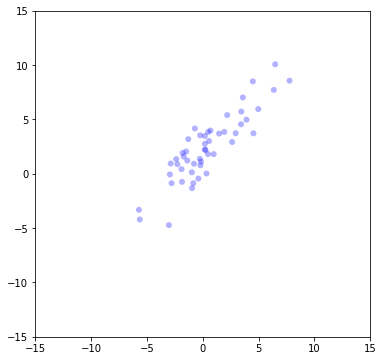

In [22]:
from scipy.stats import norm
n = 50
D = 2
# generate multiple 2-D (column) vectors
N = norm.rvs(0,1,(D,n))
S = np.copy(N)
S[0,:] *= 4
f = +pi/4    
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]])
X = R@S  # matrix multiplication with rotation matrix
X += np.array([[1],[3]]) # shift
avg = mean(X, axis=1).reshape(X[:,1].size,1)
Xtilde = X - avg
figure(figsize=(6,6)); xlim(-15,15); ylim(-15,15);
scatter(X[0,:],X[1,:],marker='o',color='b',alpha=0.3, edgecolor='none')

In [23]:
Xtilde.shape

(2, 50)

In [24]:
# compute PCA via (centered) data matrix
U, W, V = np.linalg.svd(Xtilde)
Lambda = W**2 / (X[0,:].size-1)
print(U, Lambda,'\n')

print("First principal component:",U[:,0])
print("Second principal component:",U[:,1])
print("Variance explained by first principal component:",Lambda[0])
print("Variance explained by second principal component:",Lambda[1])

[[-0.68411828 -0.72937108]
 [-0.72937108  0.68411828]] [16.85149959  1.05132234] 

First principal component: [-0.68411828 -0.72937108]
Second principal component: [-0.72937108  0.68411828]
Variance explained by first principal component: 16.851499591345224
Variance explained by second principal component: 1.0513223350598206


In [75]:
# alternative computation of PCA via eigendecomposition of sample covariance matrix
C = Xtilde @ Xtilde.T / (n-1) 
L , E = np.linalg.eig(C)
# if numpy.linalg.eig is used, the eigenvectors and eigenvalues returned are not necessarily correctly ordered.
# Remember, we want that the first entry of L corresponds to the _largest_ eigenvalue, the second to the second largest, etc.
# For this reason, we need to reorder the entries of L in a non-increasing manner, and use the same rearrangement to reorder the columns of E.
def reorder_eigs(E,L): # reordering is the purpose of the function reorder_eigs
    ind = np.argsort(L)
    ind = ind[::-1]
    L_sorted = L[ind]
    E_sorted = E[:,ind]
    return E_sorted, L_sorted
E_sorted, L_sorted = reorder_eigs(E,L)
print(E,L)
print(E_sorted,L_sorted)
E = E_sorted
L = L_sorted

[[-0.72937108 -0.68411828]
 [ 0.68411828 -0.72937108]] [0.05156636 0.82655003]
[[-0.68411828 -0.72937108]
 [-0.72937108  0.68411828]] [0.82655003 0.05156636]


[[-0.68411828 -0.72937108]
 [-0.72937108  0.68411828]] [0.82655003 0.05156636] 



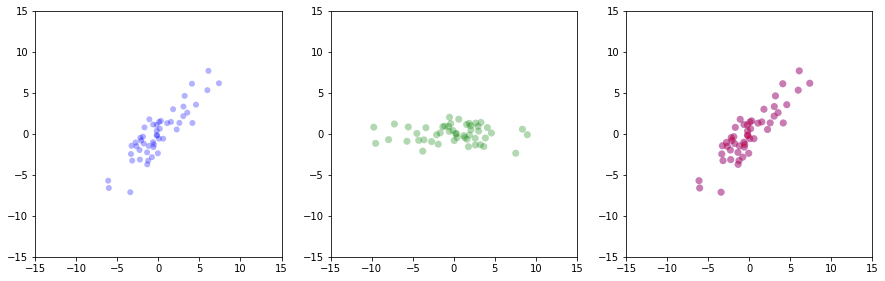

In [76]:
print(E, L,'\n')
A = E.T @ Xtilde #E.T.dot(Xtilde);
P = E @ A #E.dot(A)

figure(figsize=(15,5)); #xlim(-10,10); ylim(-10,10);
subplot(1,3,1).set_aspect('equal');
scatter(Xtilde[0,:],Xtilde[1,:],marker='o',color='b',alpha=0.3, edgecolor='none');xlim(-15,15); ylim(-15,15);
subplot(1,3,2).set_aspect('equal');
scatter(A[0,:],A[1,:],marker='o',color='g',s=50,alpha=0.3,edgecolor='none');xlim(-15,15); ylim(-15,15);
subplot(1,3,3).set_aspect('equal');
scatter(Xtilde[0,:],Xtilde[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');xlim(-15,15); ylim(-15,15);

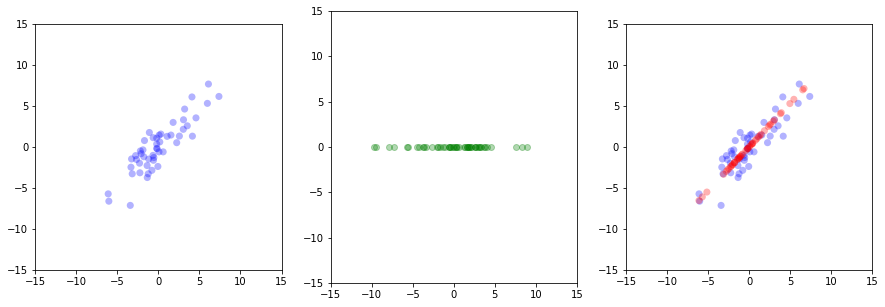

In [26]:
# projected points
A1 = E[:,:1].T.dot(Xtilde);
P1 = E[:,:1].dot(A1) # alternatively: P = E[:,:1] @ E[:,:1].T @ X

figure(figsize=(15,5)); #xlim(-10,10); ylim(-10,10); xlim(-15,15); ylim(-15,15);
#scatter(X[0,:],X[1,:],marker='o',color='b',alpha=0.3, edgecolor='none')
subplot(1,3,1).set_aspect('equal');
scatter(Xtilde[0,:],Xtilde[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');xlim(-15,15); ylim(-15,15);
subplot(1,3,2)#.set_aspect('equal');
plot(A1,np.zeros((1,A1.size)),marker='o',color='g',alpha=0.3);xlim(-15,15); ylim(-15,15);
subplot(1,3,3).set_aspect('equal');
scatter(Xtilde[0,:],Xtilde[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P1[0,:],P1[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');xlim(-15,15); ylim(-15,15);

In [27]:
A1.shape

(1, 50)

### PCA as Coordinate Transformation

  - If $k=D$, we have $E_k = E$ and  $E_k\,E_k^T = I$,  multiplication of data matrix by transpose of $E_k$ is a **rotation**. If $k < D$, truncated set of eigenvectors $E_k$ defines a **projection**!

> $\displaystyle  Z_k = E_k^T\, \widetilde{X}  = \begin{bmatrix} E_k^T \widetilde{x}_1, & \ldots, & E_k^T \widetilde{x}_n \end{bmatrix}\in \mathbb{R}^{k \times n}$:
   <br>
   
   We say the $i$-th column of $Z_k$ contains the **"principal component scores"** of $i$-th data point $\widetilde{x}_i$.

  - If $k < D$, we say that
  
> $\displaystyle  X_k = E_k Z_k = E_k E_k^T\, \widetilde{X} = P_k\,\widetilde{X} \in \mathbb{R}^{D \times n}$

   is the **projected data matrix**. $P_k = E_k E_k^T$ is a projection matrix.

### Covariance in new coordinate system

- After transformation via PCA, covariance matrix is _diagonal_ and the elements are the eigenvalues of $C$.
Assume $X$ is centered, i.e., $\widetilde{X}=X$.

> Then sample covariance matrix of $Z=E^T X$ is
><br/><br/>
> $\displaystyle \ \ \ \ \ \ \ \ \frac{1}{n-1}Z Z^T =\frac{1}{n-1} E^T X\,X^T E = E^T C E = E^T E \Lambda E^T\,E = \Lambda$,
><br/><br/>
> since $C = E \Lambda E^T$ eigendecomposition of sample covariance matrix $C$ of $X$, where 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_D} \\
\end{array} \right)$

- If PCA with $k<D$ principal components is used: 

> Then the sample covariance matrix of $Z_k=E_k^T X$ is also _diagonal_ and
><br/><br/>
> $\displaystyle \ \ \ \ \ \ \ \ \frac{1}{n-1}Z_k Z_k^T =\frac{1}{n-1} E_k^T X\,X^T E_k = E_k^T C E = E_k^T E \Lambda E^T\,E_k = \Lambda_k = \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_k} \\
\end{array} \right)$

- **Total variance** of data set: $\sum_{i=1}^D \lambda_i$.
- **Variance explained by first $k$ principal components**:  $\sum_{i=1}^k \lambda_i$

### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $D$ to $k$ while preserving the most variance possible!

In [28]:
# principle components from sklearn
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
# sklearn uses a different convention
pca.fit(X.T) # note the transpose
vars(pca)

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'n_features_in_': 2,
 '_fit_svd_solver': 'full',
 'mean_': array([0.40096869, 2.40557857]),
 'noise_variance_': 0.0,
 'n_samples_': 50,
 'n_features_': 2,
 'components_': array([[ 0.68411828,  0.72937108],
        [ 0.72937108, -0.68411828]]),
 'n_components_': 2,
 'explained_variance_': array([16.85149959,  1.05132234]),
 'explained_variance_ratio_': array([0.94127617, 0.05872383]),
 'singular_values_': array([28.73540464,  7.17738075])}

In [31]:
Z = pca.transform(X.T).T
print (pca.components_.T, pca.explained_variance_)

[[ 0.68411828  0.72937108]
 [ 0.72937108 -0.68411828]] [16.85149959  1.05132234]


### Whitening
- Frequently used to preprocess data, e.g., in signal processing
- Instead of $Z_k = E_k^T \widetilde{X}$ as above, define

>$ \displaystyle Z_k = \Lambda_k^{-1/2}\ E_k^T\ \widetilde{X}$

as coordinates in new coordinate system defined by PCA.

See also the parameter "whiten" in [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html]).

- **Unhomework:** Verify that its covariance matrix is identity in this case.

In [32]:
# calculate
B = diag(1/sqrt(L)).dot(A)

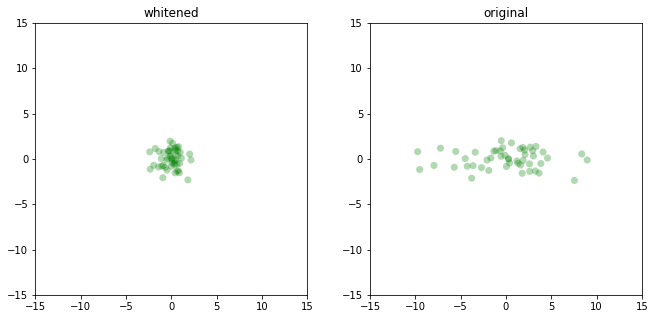

In [33]:
# plot whitened coordinates and original coordinates
figure(figsize=(11,5)); 
subplot(1,2,1).set_aspect('equal'); xlim(-15,15); ylim(-15,15); title('whitened')
scatter(B[0,:],B[1,:], marker='o',color='g', s=50, alpha=0.3, edgecolor='none');
subplot(1,2,2).set_aspect('equal'); xlim(-15,15); ylim(-15,15); title('original')
scatter(A[0,:],A[1,:], marker='o',color='g', s=50, alpha=0.3, edgecolor='none');

In [34]:
import statistics
print((statistics.variance(B[0,:]),statistics.variance(A[0,:])))
print((statistics.variance(B[1,:]),statistics.variance(A[1,:])))

(1.0, 16.851499591345227)
(1.000000000000003, 1.0513223350598206)


### PCA as a finding the "best" $k$-dimensional hyperplane

- Similarly, fitting a $k$-dimensional hyperplane in $D$ dimensions, i.e., looking for the set of orthonormal vectors $\{u_1,\ldots,u_k\}$ that minimize the squared distances between projections $\{E_k E_k^T x_1,\ldots,E_k E_k^T x_n\}$ of data points and original data points $\{x_1,\ldots,x_n\}$.

For $k=1$:
> Minimizing sum of square lengths of the residual vectors
><br/><br/>
>$\displaystyle \qquad \min_u \sum_i r_i^2(u) \ \ \ \ \ $  where $\ \ \ r_i(u) = x_i - \left(u\,u^T\right)x_i$, 
><br/><br/>
> yields 
><br/><br/>
>$\displaystyle \qquad \min_u \ \left[\textrm{const} - \sum_i u^T\!\!\left(x_i x_i^T\right) u\right]$
><br/>
or
><br/>
>$\displaystyle \qquad \max_u \ u^T\!\left(\sum_i x_i x_i^T\right)\, u $ 
><br/><br/>
> cf. sample variance along $u$, if data already centered (see above!)

Can be generalized easily to $k > 1$.

array([[0.40096869],
       [2.40557857]])

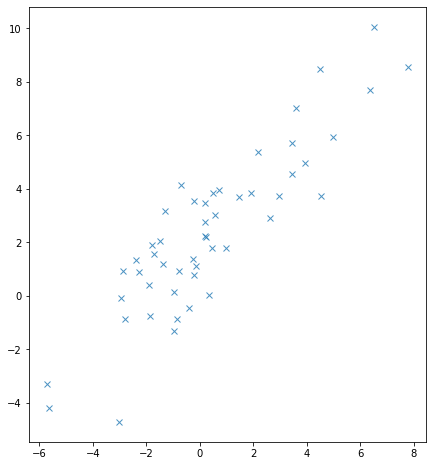

In [35]:
figure(figsize=(8,8)); subplot(111,aspect='equal');
plot(X[0,:],X[1,:],'x',alpha=0.8);
avg

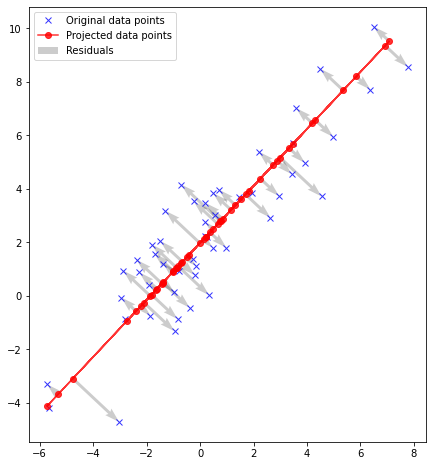

In [36]:
# project on 1st pricipal component
R = Xtilde - P1 # compute residuals

figure(figsize=(8,8)); subplot(111,aspect='equal');
plot(Xtilde[0,:]+avg[0],Xtilde[1,:]+avg[1],'xb',alpha=0.8);
plot(P1[0,:]+avg[0],P1[1,:]+avg[1],'-or',alpha=0.8);
quiver(P1[0,:]+avg[0],P1[1,:]+avg[1],R[0,:],R[1,:], alpha=0.2,
    angles='xy',scale_units='xy',scale=1);
legend(['Original data points','Projected data points','Residuals'])

## PCA in higher dimensions

#### Example with $D=10$

In [39]:
from scipy.stats import ortho_group
# generate 10-D vectors: scale, rotate
np.random.seed(1)
n = 1000
D = 10
# generate multiple 2-D (column) vectors
Z = norm.rvs(0,1,(D,n))
if True: # scale them here
    for i in range(Z[:,0].size): 
        Z[i,:] *= sqrt(i)
    Z[:4,:] *= 1e-7
    
# quick-n-dirty random rotation
Q = ortho_group.rvs(D) # sample random rotation matrix
XX = Q @ Z # random rotation
print (XX.shape)
#np.savetxt("temp.csv", Y.T, delimiter=",")

(10, 1000)


In [40]:
import pandas as pd
XXframe = pd.DataFrame(XX)
XXframe

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.695933,-1.073074,3.309643,-4.100628,1.250072,1.612090,-0.079723,4.306529,-0.173542,-3.791657,...,3.208864,4.469196,-1.948555,0.878212,1.818757,3.176684,1.044616,1.142072,-0.866566,1.518023
1,3.785834,0.093417,-1.796206,-1.286176,-3.037420,0.386012,0.429754,0.859662,-2.998099,1.628510,...,2.342722,-0.524775,-1.525533,-2.776016,-1.257086,1.204108,1.627768,-0.368989,-1.128982,-0.229251
2,5.924210,0.509451,-2.474448,1.489012,-3.434212,-0.294646,0.827693,-0.630922,-2.846860,4.387120,...,1.372580,-1.840393,-0.241895,-1.609430,-2.744469,-0.467749,2.168960,-1.089250,0.612271,-0.434079
3,2.356574,-0.598082,2.670333,0.677899,1.051821,0.076322,0.003422,1.218681,1.086614,0.389112,...,1.506442,3.430083,-0.377669,2.466989,-0.387084,-0.073600,2.182102,0.969757,1.423716,1.507732
4,-3.503459,3.663062,-3.956160,-2.123689,0.686010,3.137010,2.634461,-1.442108,1.560456,3.184942,...,-1.376097,-4.528334,0.736535,-0.099290,1.007575,-0.488835,-2.211484,-4.090527,-0.342711,-2.259199
5,3.321084,2.605558,-2.094598,-1.962395,-1.084213,2.110749,2.847175,-0.108414,0.275959,4.922771,...,2.640379,-0.665314,-1.193301,-0.080428,-1.278220,-0.672132,1.801467,-2.599062,0.359430,-1.649588
6,-1.461990,-0.493433,1.460666,-3.114368,-0.682086,-1.146965,1.724908,1.956460,-1.527581,-1.626618,...,3.191792,0.757041,-0.609061,0.344331,-1.002520,-0.066390,-0.258318,-0.669124,0.700640,-3.272157
7,-1.366435,-1.030820,-0.694678,-2.248663,-1.843480,-2.810138,-0.401385,-0.929817,-1.663816,-2.880334,...,1.017030,-0.709413,-1.362183,-3.998921,-0.511325,-0.800791,-1.671724,1.213295,-2.358716,-3.431546
8,0.377905,1.691589,-1.097983,-2.530818,-0.316486,-1.063570,2.230575,-2.146153,1.701805,1.811049,...,2.005741,-0.284583,-1.452708,-1.326442,-1.189274,-3.085404,-0.390376,-0.938072,-0.679869,-4.669297
9,4.094035,1.060603,-0.120711,2.374358,1.204566,0.112329,-0.419169,-2.885200,3.671805,3.309192,...,-0.796725,1.846173,-0.712584,0.505368,-0.294047,-2.447618,1.825941,1.103630,-0.099091,1.301138


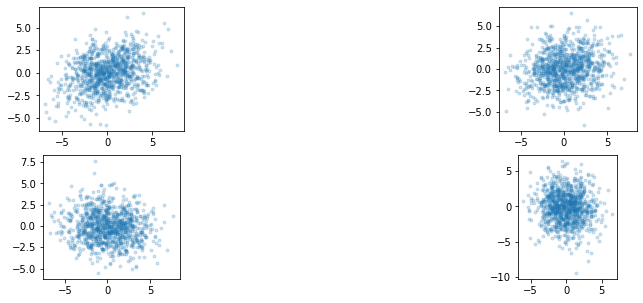

In [41]:
# visualize some 2d data variable slices of data set
i = 0
j = 1
figure(figsize=(15,5)); #xlim(-10,10); ylim(-10,10);
subplot(2,2,1).set_aspect('equal');
plt.plot(XX[i,:], XX[j,:], '.', alpha=0.2);
subplot(2,2,2).set_aspect('equal');
j = 5
plt.plot(XX[i,:], XX[j,:], '.', alpha=0.2);
subplot(2,2,3).set_aspect('equal');
j = 8
plt.plot(XX[i,:], XX[j,:], '.', alpha=0.2);
subplot(2,2,4).set_aspect('equal');
i = 4
j = 9
plt.plot(XX[i,:], XX[j,:], '.', alpha=0.2);

See documentation of [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for how to use the scikit-learn module dedicate to PCA.

Principal components: [[ 0.63870058  0.0086841   0.41857165 -0.21676295  0.42989643  0.00986775
   0.41853172  0.03274534 -0.02800387  0.08868013]
 [ 0.19330625  0.35090487 -0.26956691 -0.4774929   0.19495013  0.15078089
  -0.44081669 -0.38405383 -0.33012213 -0.16521175]
 [-0.13063955  0.45585802 -0.31704236 -0.34416429 -0.32083239 -0.07440475
   0.5854454   0.14521711 -0.13705714  0.25509486]
 [ 0.03654795  0.09014315  0.47897821 -0.09447162 -0.31904577 -0.11960085
  -0.41281897  0.13857872 -0.29123046  0.60138185]
 [-0.17171058  0.26457655 -0.16543872  0.48137471  0.57234676 -0.24430342
   0.00743792  0.15624941 -0.44039724  0.18904825]
 [-0.02104909  0.64965336  0.16900846  0.00366729  0.12961712 -0.05421777
  -0.23967633  0.32094648  0.59472828 -0.12262493]
 [ 0.43991474  0.23354383  0.05030637  0.39114484 -0.45434278 -0.02186827
   0.00979034  0.17248738 -0.3489287  -0.48775273]
 [ 0.21317486 -0.11987016 -0.33606321  0.04573427  0.05690237  0.68897487
  -0.12904222  0.52387797 -0.

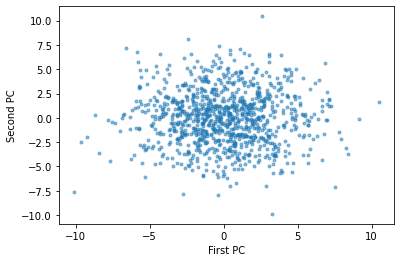

In [43]:
pca = decomposition.PCA(n_components=XX.shape[0], whiten=False)
B0 = pca.fit_transform(XX.T).T
E, L = pca.components_.T, pca.explained_variance_
plt.figure()
plt.plot(B0[0,:], B0[1,:], '.', alpha=0.5);
plt.xlabel('First PC')
plt.ylabel('Second PC')
print("Principal components:",E)
print("Variance explained principal components:",L)

### Scree Plot

Gives guidance to answer the question:
  - How do we choose the dimension $k$ of the subspace to be used by PCA?

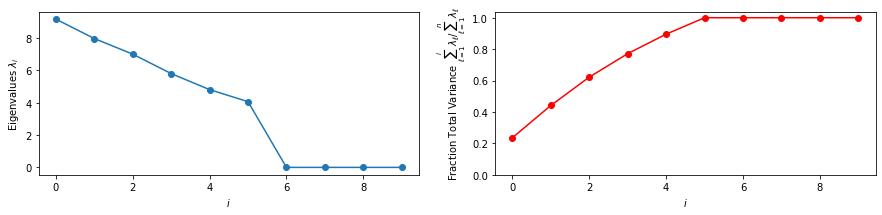

In [44]:
figure(figsize=(15,3))
subplot(121); plot(L,'o-'); xlabel(r'$i$');ylabel(r'Eigenvalues $\lambda_i$');
subplot(122); cl=np.cumsum(L); xlabel(r'$i$');ylabel(r'Fraction Total Variance $\sum_{\ell=1}^i \lambda_\ell / \sum_{\ell=1}^n \lambda_\ell $');
ratio = cl/cl[-1]
plot(ratio,'o-r'); ylim(0,None);

The ratio of the variance explained by the first two PCs can be calculated as 
$$
\frac{\sum_{\ell=1}^2 \lambda_\ell}{\sum_{\ell=1}^{10} \lambda_\ell},
$$
amounts to:

In [45]:
ratio[1]

0.4415061619827095

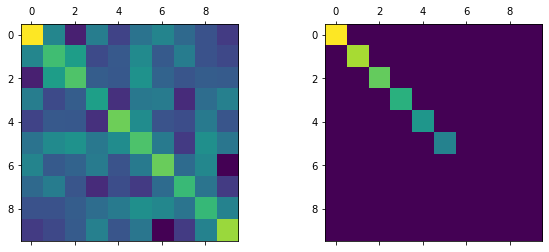

In [46]:
# plot orig and new covariance matrices (estimate w/o norm)
plt.figure(figsize=(10,4))
ax=subplot(121); ax.matshow(XX @ XX.T);
ax=subplot(122); ax.matshow(B0 @ B0.T);

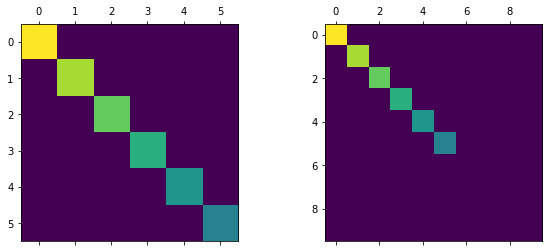

In [47]:
Bfirst6 = B0[:6,:]
# plot new covariance matrices with and without truncation
plt.figure(figsize=(10,4))
ax=subplot(121); ax.matshow(Bfirst6 @ Bfirst6.T);
ax=subplot(122); ax.matshow(B0 @ B0.T);

### Key Steps of PCA in Practice

Input: Data matrix $X = \begin{bmatrix} x_1 ,\dots, x_n \end{bmatrix} \in \mathbb{R}^{D \times n}$, subspace dimension parameter $k \leq D$.

  1. **Mean substraction (and standarization)**: If $\overline{X}$ is the matrix of row averages of $X$ in each column, compute 
  > $\widetilde{X} = X - \overline{X}$
  
  or
  
  > $\widetilde{X} = S^{-1}(X - \overline{X})$ <br>
  
  where $S$ is a diagonal matrix with the sample standard deviation of the $i$-th row of $X - \overline{X}$ (**standardization**). We did not mention standardization above, but especially in high-dimensional datasets this can be helpful.
  
  2. Compute **principal components**
  > $E_k = \begin{bmatrix} u_1 ,\dots, u_k \end{bmatrix}  \in \mathbb{R}^{D \times k}$
  
  (orthogonal basis $\{u_1 ,\dots, u_k\}$ of subspace) and 
  
  > $\Lambda_k = \operatorname{diag}(\lambda_i)_{i=1}^k \mathbb{R}^{k \times k}$
  
  (**explained variances**) via SVD  of $\widetilde{X}$ or via **eigendecomposition** of sample covariance matrix $C = \frac{1}{n\!-\!1}\widetilde{X}\widetilde{X}^T$.
  
  3. **Projection**: Compute coordinates of data points in the $k$-dimensional subspace defined by $E_k$ (also called the **scores** of the data points with respect to the principal components):
  
  > $Z_k = E_k^T\, \widetilde{X} \in \mathbb{R}^{k \times n}$
  
Depending on context/application, we also need:

  4. Obtain the **coordinates** of the projected data points **in coordinate system of the original data** matrix $X$:
  
  > $X_k = (E_k Z_k + \overline{X}) \in \mathbb{R}^{D \times n}$
  
  or 
  
  > $X_k = S(E_k Z_k + \overline{X}) \in \mathbb{R}^{D \times n}$.
  
Output: $E_k$, $Z_k$, $\Lambda_k$, potentially also $X_k$.